In [ ]:
import csv
import matplotlib.pyplot as plt
import numpy as np


In [3]:
metric = "test_metrics_mean"
column_name = "test/acc/ave"

# metric = "test_forgetting_ratio_mean"
# column_name = "test/fr/ave"

# metric = "test_fm_mean"
# column_name = "fm"

# metric = "test_im_mean"
# column_name = "im"

# metric = "test_bwt_mean"
# column_name = "bwt"

# metric = "test_fwt_mean"
# column_name = "fwt"


In [28]:
# Mean Baselines (20 tasks, epoch=2)
baselines = [
    "Finetuning_1",
    "LwF_1",
    "EWC_1", 
    "HAT_1", 
    "ada", 
    "ada_random",    
    "ada_cons_alpha",
    "ada_cons_1",
    "Random_1",
]

legend_list = [
    "Finetuning",
    "LwF",
    "EWC", 
    "HAT", 
    "AdaHAT", 
    "HAT-random",
    "HAT-const-alpha",
    "HAT-cons-1",
    # "HAT_cons_alpha_all",
    # "HAT_random_all",
    "Random",
]

csv_path_list = [f"../../logs_saved/pmnist/{b}/runs/{metric}.csv" for b in baselines]


In [44]:

# Mean Ablations (20 tasks, epoch=2)
baselines = [
    # "Finetuning_1",
    "HAT_1", 
    "ada", 
    "ada_reg_0",
    # "ada_reg_1",
    # "ada_reg_09",
    # "ada_sum_1",
    "ada_sum_t",
]

legend_list = [
    # "Finetuning",
    "HAT", 
    "AdaHAT", 
    # "AdaHAT_reg_0",
    # "AdaHAT_reg_1",
    "AdaHAT-no-reg",
    # "AdaHAT_sum_1",
    "AdaHAT-no-sum",
]

csv_path_list = [f"../../logs_saved/pmnist/{b}/runs/{metric}.csv" for b in baselines]


In [41]:

# Hyperparameter study on AdaHAT (20 tasks, epoch=2)
baselines = [    
    "hparams_study_1e-7",
    "hparams_study_5e-7",
    "hparams_study_9e-7",
    "hparams_study_1e-6",
    "hparams_study_2e-6",
    "hparams_study_5e-6",
    "hparams_study_1e-5",
]


legend_list = [
    r"$\alpha$ = 1e-7",
    r"$\alpha$ = 5e-7",
    r"$\alpha$ = 9e-7",
    r"$\alpha$ = 1e-6",
    r"$\alpha$ = 2e-6",
    r"$\alpha$ = 5e-6",
    r"$\alpha$ = 1e-5",
]


csv_path_list = [f"../../logs/{b}/runs/{metric}.csv" for b in baselines]


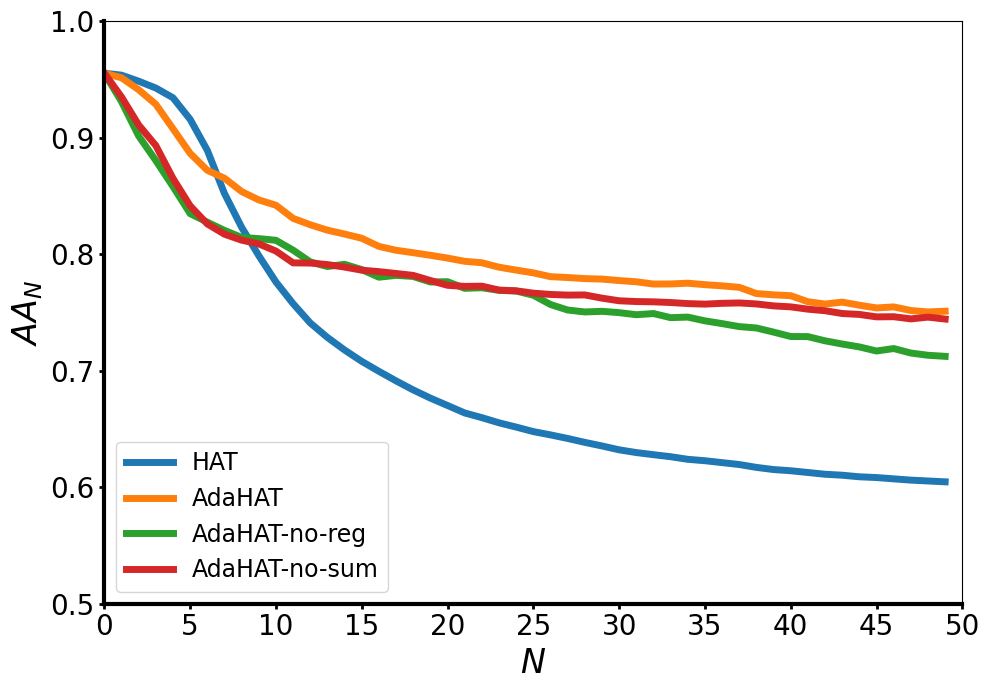

In [47]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# 创建图形和轴对象
fig, ax = plt.subplots(figsize=(10, 7))  # 增大主图的大小

# 设置全局样式
# ax.grid(True)
ax.set_xlabel(r"$N$", fontsize=24)  # 增大 x 轴标签字体并加粗
ax.set_ylabel(r"$AA_{N}$", fontsize=24)  # 增大 y 轴标签字体并加粗

# 设置 x 轴刻度
ax.xaxis.set_major_locator(plt.MultipleLocator(5))  # 每隔5个单位显示一个刻度
ax.set_xlim(0, 50)  # 设置 x 轴刻度范围

# 设置 y 轴刻度
ax.yaxis.set_major_locator(plt.MultipleLocator(0.1))
ax.set_ylim(0.5, 1)
ax.tick_params(axis='both', which='major', labelsize=20)  # 设置刻度大小为20

# 设置坐标轴粗细
ax.tick_params(axis='x', width=2)  # x 轴粗细为2
ax.tick_params(axis='y', width=2)  # y 轴粗细为2
ax.spines['bottom'].set_linewidth(3)  # 设置底部坐标轴的粗细
ax.spines['left'].set_linewidth(3)  # 设置左边坐标轴的粗细

# 循环绘制每个数据集
for csv_path, legend in zip(csv_path_list, legend_list):
    task_column = []
    metric_column = []
    with open(csv_path) as csvfile:
        reader = csv.DictReader(csvfile)
        for row in reader:
            task_val = int(float(row["task"]))
            task_column.append(task_val)
            metric_val = float(row[column_name]) if row[column_name] else np.nan
            metric_column.append(metric_val)
    
    # 绘制折线，并调整线条粗细
    ax.plot(task_column, metric_column, label=legend, linewidth=5, linestyle='solid')  # 使用默认线型

# 添加图例，并将图例放在图内分成两部分
ax.legend(fontsize=17, loc='lower left', ncol=1, shadow=False)  # 调整图例大小为16，并放在图内，并分成两列，并移除阴影

# 显示图形
plt.tight_layout()

plt.savefig('plot.pdf', format='pdf')
plt.show()
